# Introduccion Del Proyecto<br> 
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.<br><br>
Construir un prototipo de un modelo de aprendizaje automático para la deteccion de estos clientes puede llegar a cancelar los servicios

## Objectivo

Desarrollar un modelo de aprendizaje automatico con un `ROC_AUC` mayor que `0.75` para la deteccion de estos clientes que pueden llegar a cancelar los servicios




# Plan de Trabajo
## Preguntas Aclaratorios 
1.¿Podemos considerar que si en la columna "endDate" hay una fecha, significa que el cliente ha dejado nuestro servicio?<br>
## Plan para resolver la tarea 
1. Realizar un merge de las tablas<br><br>
El proposito del merge es juntar todo los datos en uno para tener la mayor cantidad de caracteristicas para llegar a entrenar un modelo de clasificacion<br>
Esta tabla historica que vamos a genera con todo los datos, nos puede servir para poder ver toda la informacion de nuestros clientes<br><br>
2. Limpieza de Datos <br><br>
Asegurar que los datos  esten limpios y listo para generar nuestro Analisis<br><br>  
3. Analisis Exploratorio de Datos<br><br>
Realizar un análisis visual de los datos para identificar patrones, tendencias y relaciones de nuestros clientes<br>
Para la generacion de conclusion de como actuan nuestro clientes<br><br>
4. Procesamiento de datos <br><br>
Para que los datos estén en un formato adecuado y optimizado para el algoritmo de aprendizaje automático que se utilizará<br>
Como la creacion de la columna para identificar los clientes que siguien usan los servicio y los cuales no, seria nuestra columna objectiva<br><br>
5. Entrenamietno de modelo<br><br>
Entrenamiento y Evaluación de Algoritmos de Aprendizaje Automático para medir su rendimiento<br><br>
6. Generación de Informes y Conclusiones<br><br>
Resumir y comunicar los hallazgos del análisis<br><br>

In [1]:
#Importar librerias 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold,GridSearchCV,RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importar datasets
try:
    Contratos = pd.read_csv('/datasets/final_provider/contract.csv')
    Internet = pd.read_csv('/datasets/final_provider/internet.csv')
    Personal = pd.read_csv('/datasets/final_provider/personal.csv')
    Phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    Contratos = pd.read_csv('../datasets/Input/contract.csv')
    Internet = pd.read_csv('../datasets/Input/internet.csv')
    Personal = pd.read_csv('../datasets/Input/personal.csv')
    Phone = pd.read_csv('../datasets/Input/phone.csv')

# Analisis Exploratorio de Datos

In [3]:
Contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
Contratos

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [5]:
# Cambio de tipo de dato
Contratos['BeginDate'] = pd.to_datetime(Contratos['BeginDate'],errors='coerce')
Contratos['EndDate'] = pd.to_datetime(Contratos['EndDate'], errors='coerce')
Contratos['TotalCharges'] = pd.to_numeric(Contratos['TotalCharges'], errors='coerce')


In [6]:
print(Contratos.isna().sum())

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64


In [7]:
print(Contratos[Contratos['TotalCharges'].isna()])

      customerID  BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01     NaT  Two year              Yes   
753   3115-CZMZD 2020-02-01     NaT  Two year               No   
936   5709-LVOEQ 2020-02-01     NaT  Two year               No   
1082  4367-NUYAO 2020-02-01     NaT  Two year               No   
1340  1371-DWPAZ 2020-02-01     NaT  Two year               No   
3331  7644-OMVMY 2020-02-01     NaT  Two year               No   
3826  3213-VVOLG 2020-02-01     NaT  Two year               No   
4380  2520-SGTTA 2020-02-01     NaT  Two year               No   
5218  2923-ARZLG 2020-02-01     NaT  One year              Yes   
6670  4075-WKNIU 2020-02-01     NaT  Two year               No   
6754  2775-SEFEE 2020-02-01     NaT  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  
488   Bank transfer (automatic)           52.55           NaN  
753                Mailed check           20.25           NaN  
936            

In [8]:
#Trato de valores null
Contratos["TotalCharges"] = Contratos["TotalCharges"].fillna(Contratos['MonthlyCharges'])

In [9]:
print(Contratos.isna().sum())

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64


In [10]:
print(Contratos.duplicated().any())

False


In [11]:
Contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [12]:
Contratos[(Contratos['Type'] == 'One year') &(~Contratos['EndDate'].isna())]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
173,0691-JVSYA,2015-05-01,2019-10-01,One year,Yes,Bank transfer (automatic),94.85,5000.20
317,2321-OMBXY,2016-08-01,2019-10-01,One year,No,Credit card (automatic),80.30,3058.65
320,5020-ZSTTY,2015-05-01,2019-11-01,One year,No,Bank transfer (automatic),82.45,4350.10
335,4322-RCYMT,2014-03-01,2019-11-01,One year,Yes,Bank transfer (automatic),75.80,5293.95
495,8205-OTCHB,2018-01-01,2019-11-01,One year,Yes,Bank transfer (automatic),43.75,903.60
...,...,...,...,...,...,...,...,...
6869,5906-CVLHP,2016-04-01,2020-01-01,One year,Yes,Credit card (automatic),54.15,2319.80
6918,8267-ZNYVZ,2017-02-01,2019-11-01,One year,Yes,Electronic check,103.75,3361.05
6972,6664-FPDAC,2015-04-01,2019-12-01,One year,Yes,Electronic check,111.95,6418.90
6996,4174-LPGTI,2016-05-01,2019-10-01,One year,Yes,Bank transfer (automatic),66.50,2728.60


## Analisis de Internet

In [13]:
Internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [14]:
print(Internet.isna().sum())

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [15]:
print(Internet.duplicated().any())

False


In [16]:
Internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


## Analisis de Personal

In [17]:
Personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [18]:
print(Personal.isna().sum())

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


In [19]:
print(Personal.duplicated().any())

False


In [20]:
Personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


## Analisis de Phone

In [21]:
Phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [22]:
print(Phone.isna().sum())

customerID       0
MultipleLines    0
dtype: int64


In [23]:
print(Phone.duplicated().any())

False


In [24]:
Phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


## Hallazgo

Con los diversos datos que se nos entregaron de los clientes, podemos notar que existen algunos servicios que no contratan estos clientes.

Con respecto a los datos de `contract`, podemos notar que en la columna de `EndDate` tenemos valores nulos y otros con fecha. Considero que estos clientes que tienen fechas son los que han dejado de usar cualquier servicio de la compañía.


## Merge de tablas


In [25]:
# Merge de tabla contratos con internet 
Merge_1 = pd.merge(Contratos,Internet,on='customerID',how='outer')
# Merge de tabla Merge_1 con Personal
Merge_2 = pd.merge(Merge_1,Personal,on='customerID',how='outer')
# Merge de tabla Merge_2 con Phone
Historical = pd.merge(Merge_2,Phone,on='customerID',how='outer')
# Creacion de la columnas Churn rate
Historical['ChurnRate'] = np.where(Historical['EndDate'].isna(),0,1)

In [26]:
Historical.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,ChurnRate
0,0002-ORFBO,2019-05-01,NaT,One year,Yes,Mailed check,65.6,593.30,DSL,No,...,No,Yes,Yes,No,Female,0,Yes,Yes,No,0
1,0003-MKNFE,2019-05-01,NaT,Month-to-month,No,Mailed check,59.9,542.40,DSL,No,...,No,No,No,Yes,Male,0,No,No,Yes,0
2,0004-TLHLJ,2019-09-01,2020-01-01,Month-to-month,Yes,Electronic check,73.9,280.85,Fiber optic,No,...,Yes,No,No,No,Male,0,No,No,No,1
3,0011-IGKFF,2018-12-01,2020-01-01,Month-to-month,Yes,Electronic check,98.0,1237.85,Fiber optic,No,...,Yes,No,Yes,Yes,Male,1,Yes,No,No,1
4,0013-EXCHZ,2019-09-01,2019-12-01,Month-to-month,Yes,Mailed check,83.9,267.40,Fiber optic,No,...,No,Yes,Yes,No,Female,1,Yes,No,No,1


In [27]:
Historical['EndDate'].value_counts(dropna=False)

EndDate
NaT           5174
2019-11-01     485
2019-12-01     466
2020-01-01     460
2019-10-01     458
Name: count, dtype: int64

In [28]:
print(Historical.isna().sum())

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
MultipleLines        682
ChurnRate              0
dtype: int64


In [29]:
Historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

## Hallazgo

Realizamos un merge de todas las tablas para tener una tabla histórica con todos los datos de nuestros clientes, en la cual se creó una columna `churnRate` para determinar los clientes que dejaron los servicios. Esto se hace mediante la columna `EndDate`, en la cual, si tiene una fecha, se considera que un cliente ha dejado los servicios.


## Visualizacion de datos 

In [30]:
# Creacion de un dataframe aparte, para modificar los datos para genera visualizaciones
df_grafica = Historical.copy()

In [31]:
print(f"Existen {df_grafica[df_grafica['EndDate'].isna()].shape[0]} clientes que siguien con el servicio")
print(f"Existen {df_grafica[~df_grafica['EndDate'].isna()].shape[0]} clientes que han terminado con el servicio")

df_grafica_EndDate = df_grafica[~df_grafica['EndDate'].isna()]
df_grafica_EndDate = df_grafica_EndDate.copy()

Existen 5174 clientes que siguien con el servicio
Existen 1869 clientes que han terminado con el servicio


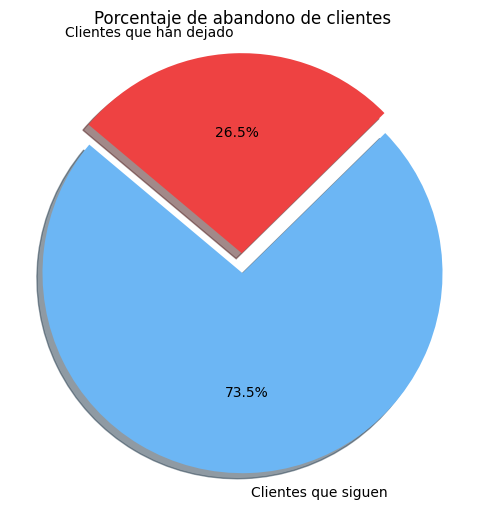

In [81]:
#Realizar un grafico de pastel
counts = df_grafica['ChurnRate'].value_counts()
# Preparar los datos
labels = ['Clientes que siguen','Clientes que han dejado']
sizes = [counts.get(0,0),counts.get(1,0)]
colors = ['#6cb6f4','#ee4242']
explode = (0.1,0)

# Crear el grafico de pastel
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title('Porcentaje de abandono de clientes')
plt.axis('equal')
plt.show()

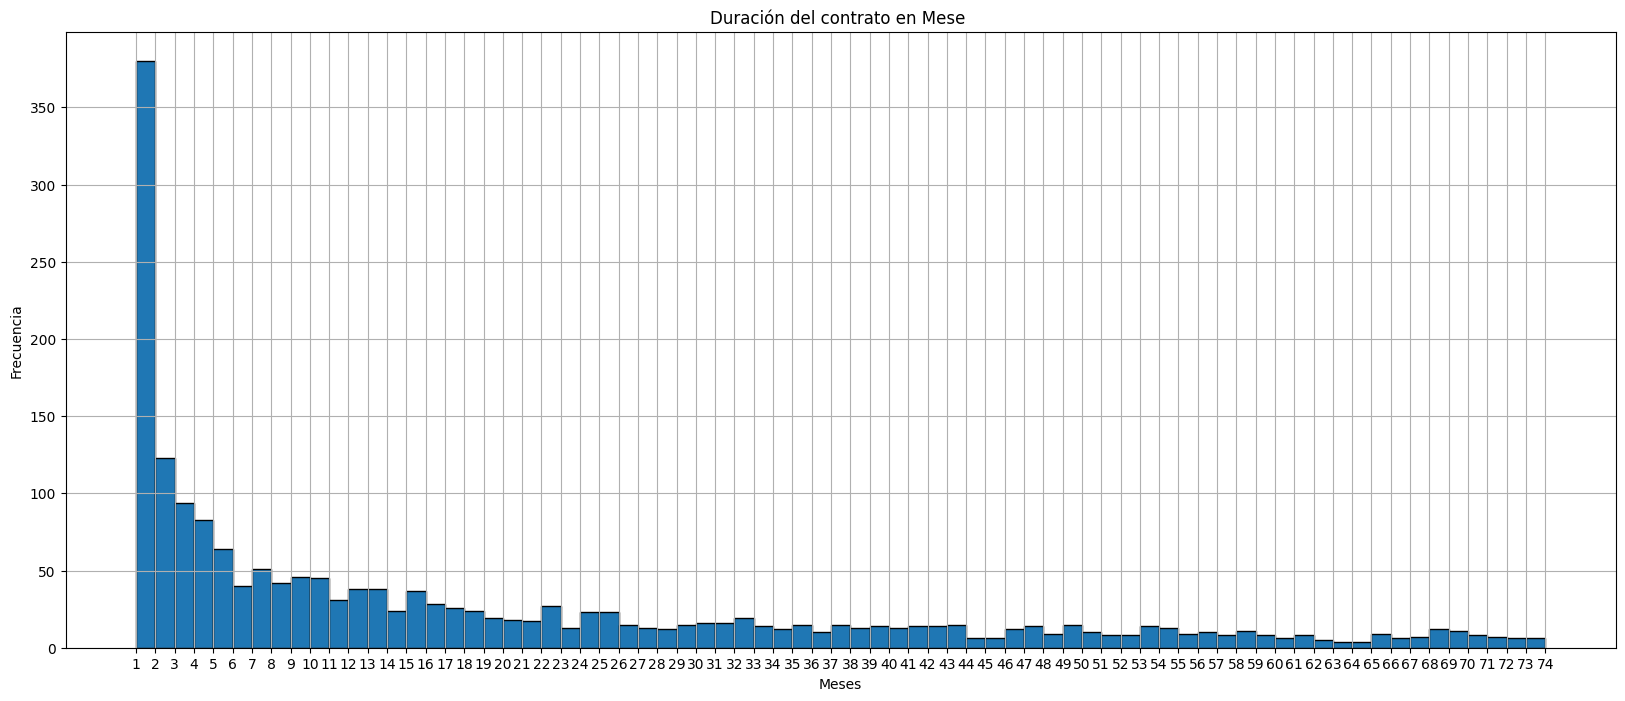

In [32]:
#Filtracion de datos que requerimos
df_grafica_EndDate['Duration'] = (df_grafica_EndDate['EndDate'] - df_grafica_EndDate['BeginDate']).dt.days
df_grafica_EndDate['Duration_months'] = df_grafica_EndDate['Duration'] // 30 
#Creacionn de grafica para visualizar el tiempo del contrato ante finalizar
plt.figure(figsize=(20, 8))

# Crear el histograma
plt.hist(df_grafica_EndDate['Duration_months'], bins=range(1, df_grafica_EndDate['Duration_months'].max() + 2), edgecolor='black')

plt.title('Duración del contrato en Mese ')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.xticks(range(1, df_grafica_EndDate['Duration_months'].max() + 2))


plt.grid(True)
plt.show()


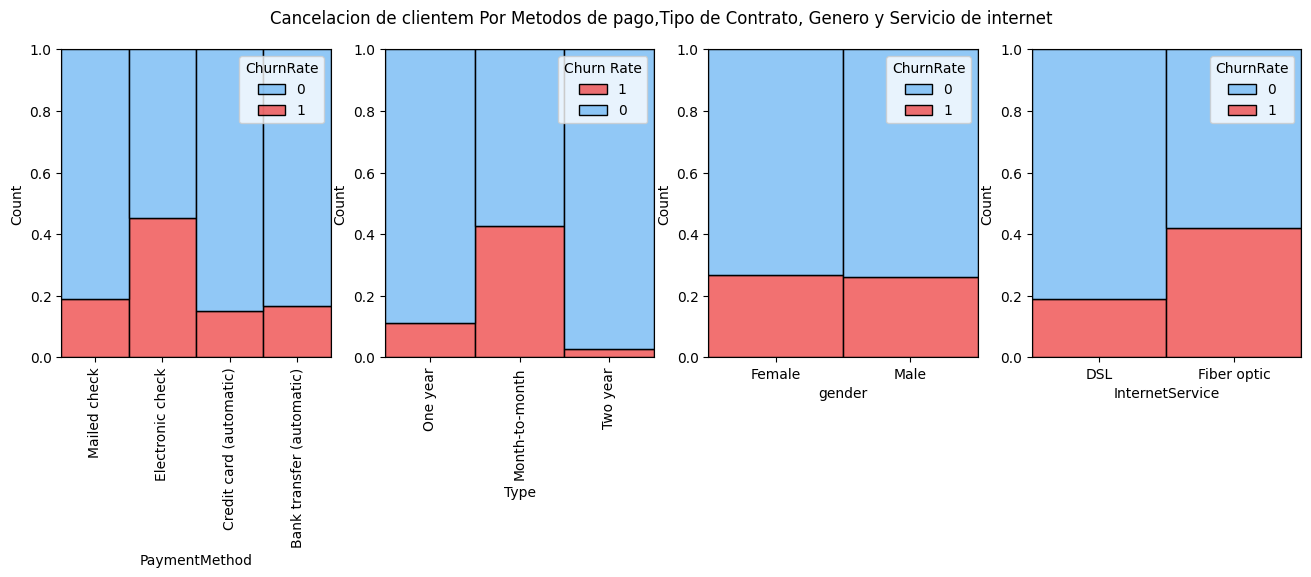

In [82]:
# Generar histogramas con diferentes propositos para analisar la cancelacion de los clientes
# De terminar el numero de graficas
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(16, 4))
# Graficar histogramas
sns.histplot(data=df_grafica, x="PaymentMethod", hue="ChurnRate", multiple="fill",ax=ax0,palette=colors)
sns.histplot(data=df_grafica, x="Type", hue="ChurnRate", multiple="fill", ax=ax1,palette=colors)
sns.histplot(data=df_grafica, x="gender", hue="ChurnRate", multiple="fill", ax=ax2,palette=colors)
sns.histplot(data=df_grafica, x="InternetService", hue="ChurnRate", multiple="fill", ax=ax3,palette=colors)
# Rotacion de los etiquetas
ax0.set_xticklabels(ax0.get_xticklabels(), rotation= 90)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)
ax1.legend([1,0],loc='upper right', title='Churn Rate')
fig.suptitle("Cancelacion de clientem Por Metodos de pago,Tipo de Contrato, Genero y Servicio de internet")


plt.show()

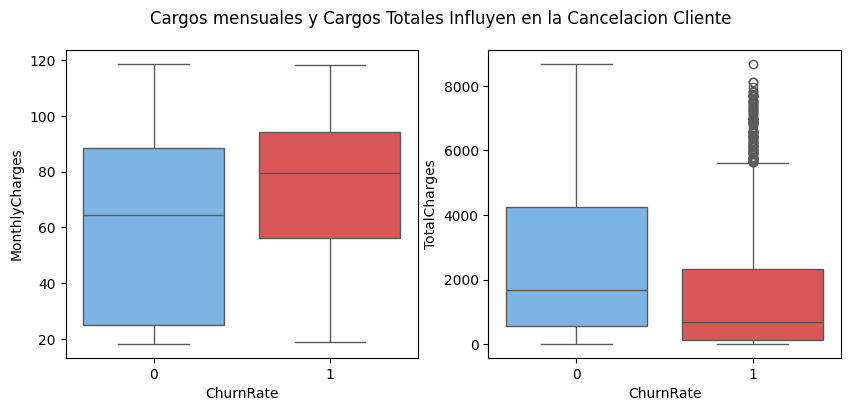

In [77]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
custom_palette = {'0': '#6cb6f4', '1': '#ee4242'}
sns.boxplot(data=df_grafica, x="ChurnRate", y="MonthlyCharges", ax=ax0,palette=custom_palette)
sns.boxplot(data=df_grafica, x="ChurnRate", y="TotalCharges", ax=ax1,palette=custom_palette)
fig.suptitle("Cargos mensuales y Cargos Totales Influyen en la Cancelacion Cliente")
fig.show()

## Hallazgo

Con las visualizaciones generadas, podemos decir que el primer mes en que el cliente contrata el servicio es muy importante, dado que hay una mayor frecuencia de clientes que dejan de usar nuestros servicios después del primer mes.

Los usuarios que realizan su pago por cheque electrónico, tienen su contrato mes a mes y utilizan fibra óptica, tienen una mayor frecuencia de dejar nuestros servicios.

Los usuarios que tienen un cargo mensual alto, con una media de 80 USD, tienden a dejar el servicio, pero los usuarios que tienen un cargo total con una media de casi 2000 USD se mantienen en el servicio. En cambio, aquellos que tienen un cargo total por debajo de esa media tienden a dejar el servicio.

Con esto sabemos que el `26.5%` de los clientes abandonas el servicio

# Entrenamietno de modelos 

## Procesamiento de datos

In [35]:
#Eliminamos columnas que generar ruido al modelos
Historical_ohe = Historical.drop(['customerID','BeginDate','EndDate'],axis=1)
# tratamos los valores null para que el OHE genere unas columnas para los cliente no solicitaron este servicio
columns_to_replace_nan = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
Historical_ohe[columns_to_replace_nan] = Historical_ohe[columns_to_replace_nan].fillna('NoService')


In [36]:
Historical_ohe = pd.get_dummies(Historical_ohe,drop_first=False)
Historical_ohe = Historical_ohe.astype(int)
# Tratamos las columnas de cargo, para escalarlos
columns_to_scale = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
Historical_ohe[columns_to_scale] = scaler.fit_transform(Historical_ohe[columns_to_scale])

In [37]:
Historical_ohe.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,ChurnRate,Type_Month-to-month,Type_One year,Type_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),...,StreamingMovies_Yes,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_NoService,MultipleLines_Yes
0,0.023399,-0.744002,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0
1,-0.175998,-0.766503,0,0,1,0,0,1,0,0,...,1,0,1,1,0,1,0,0,0,1
2,0.289263,-0.882096,0,1,1,0,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
3,1.120088,-0.459871,1,1,1,0,0,0,1,0,...,1,0,1,0,1,1,0,1,0,0
4,0.621593,-0.887831,1,1,1,0,0,0,1,0,...,0,1,0,0,1,1,0,1,0,0


## Hallazgo

Para el procesamiento de datos, se realizó la codificación OHE para los datos categóricos. Para los datos nulos, se cambiaron a `noservice` para distinguir a los clientes que no hicieron uso de este servicio.

Se realizó un escalado para los datos que almacenan los cargos de pago de los clientes, para que el modelo pueda ser mas preciso 


## Evaluacion de modelos

In [38]:
# Preparacion de datos caracteristicas y objectivos
features = Historical_ohe.drop(['ChurnRate'],axis=1)
target = Historical_ohe['ChurnRate']
# Separacion de datos en 25% validacion y un 75% a entrenamiento
features_train,features_valid,target_train,target_valid = train_test_split(features,target,test_size=0.25,random_state=12345)
#Preparar datos sobreMuestreo
smote = SMOTE(random_state=12345)
features_resampled,target_resampled = smote.fit_resample(features_train,target_train)
#Preparacion de datos SubMuestro
rus = RandomUnderSampler(random_state=12345)
features_under_resampled,target_under_resampled = rus.fit_resample(features_train,target_train)


In [39]:
models = {
    "LR": LogisticRegression(random_state=12345, max_iter=10000),
    "CART": DecisionTreeClassifier(random_state=12345),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(random_state=12345),
    "XGB": XGBClassifier(),
}

scoring = "recall"
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for name, model in models.items():
    _scores = cross_val_score(model, features_train, target_train, scoring=scoring, cv=kfold, n_jobs=-1)
    msg = "%s has an average score of %.3f ± %.3f" % (name, np.mean(_scores), np.std(_scores))
    print(msg)
    scores.append(_scores)

LR has an average score of 0.529 ± 0.056
CART has an average score of 0.496 ± 0.043
KNN has an average score of 0.516 ± 0.024
RF has an average score of 0.463 ± 0.036
XGB has an average score of 0.500 ± 0.036


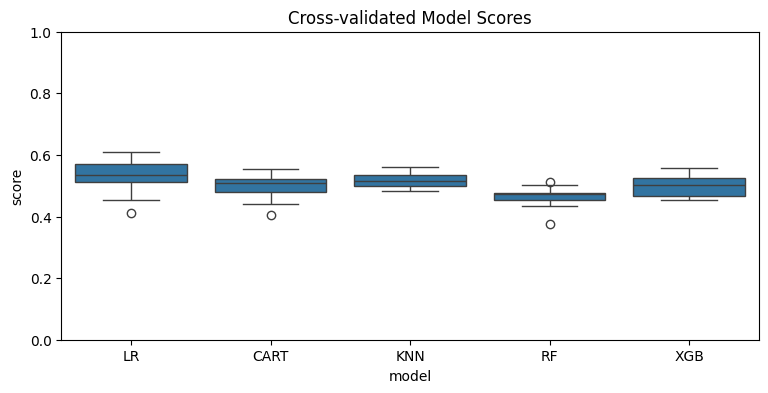

In [40]:
scores_df = pd.DataFrame(data=np.array(scores), index=list(models.keys())).reset_index().rename(columns=dict(index="model"))
scores_df = pd.melt(scores_df, id_vars=["model"], value_vars=np.arange(0, 10)).rename(columns=dict(variable="fold", value="score"))

plt.figure(figsize=(9, 4))
sns.boxplot(data=scores_df, x="model", y="score")
plt.title("Cross-validated Model Scores")
plt.ylim((0, 1))
plt.show()

In [41]:
def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc

def print_metrics(y_true, y_pred):
    accuracy, precision, recall, f1_score, roc_auc = metrics(y_true, y_pred)
    print("Accuracy: %.3f\nPrecision: %.3f\nRecall: %.3f\nF1 Score: %.3f\nROC AUC: %.3f" % (accuracy, precision, recall, f1_score, roc_auc))

def plot_curves(y_true, probas):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    precision, recall, thresholds = precision_recall_curve(y_true, probas)
    plt.plot(recall, precision, color="b")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")

    plt.subplot(122)
    fpr, tpr, tresholds = roc_curve(y_true, probas)
    plt.plot(fpr, tpr, color="g")
    plt.plot([0, 1], [0, 1], color="black", linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    fig.show()
    
kfold = StratifiedKFold(n_splits=15, shuffle=True, random_state=12345)

### Entrenamietno de modelos con Datos sin tratar  desequilibrio de clases 

Mejores hiperparámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 2}
Accuracy: 0.763
Precision: 0.530
Recall: 0.797
F1 Score: 0.636
ROC AUC: 0.774
El modelo tardó 49.6099 segundos en entrenar.


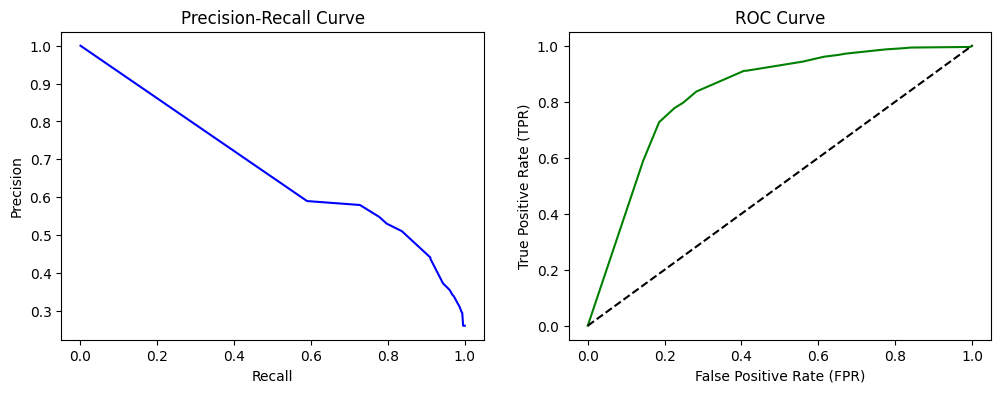

In [43]:
# Capturar el tiempo de inicio
start_time = time.time()

model = DecisionTreeClassifier(random_state=12345)
gscv = GridSearchCV(
    model,
    param_grid={
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": np.arange(2, 12),
        "min_samples_split": np.arange(2, 100, 10),
        "max_features": ["sqrt", "log2", None],
        "class_weight": [None, "balanced"]
    },
    scoring="f1",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_train, target_train)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'n_estimators': 100, 'min_samples_split': 82, 'max_features': None, 'max_depth': 5, 'criterion': 'log_loss', 'class_weight': 'balanced', 'bootstrap': True}
Accuracy: 0.760
Precision: 0.526
Recall: 0.808
F1 Score: 0.637
ROC AUC: 0.776
El modelo tardó 88.9160 segundos en entrenar.


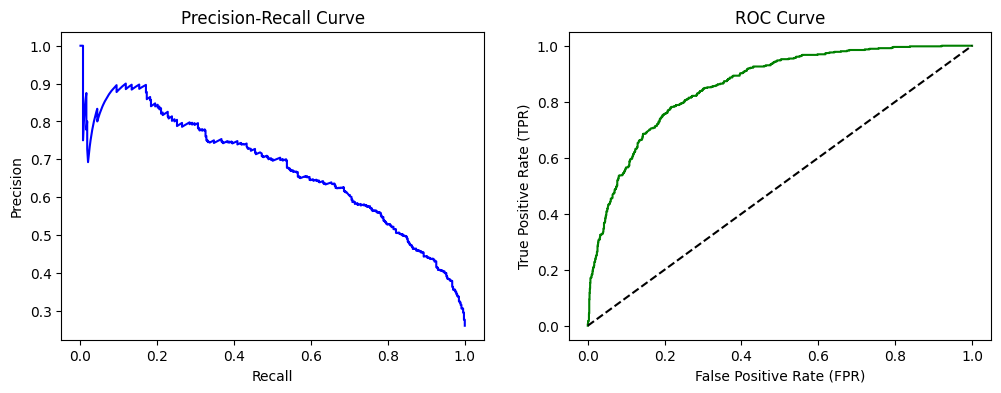

In [64]:
# Capturar el tiempo de inicio
start_time = time.time()

model = RandomForestClassifier(random_state=12345)

rscv = RandomizedSearchCV(
    model,
    param_distributions = {
    "bootstrap":[True, False],
    "n_estimators": [20,50,100],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.arange(2, 6),
    "min_samples_split": np.arange(2, 100, 10),
    "max_features": ["sqrt", "log2", None],
    "class_weight": [None, "balanced"]
},
    scoring="f1",
    n_iter=125,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_train, target_train)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
#Guardar modelos 
joblib.dump(model,'modelo_RandomForestClassifier.pkl')
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.735
Precision: 0.495
Recall: 0.838
F1 Score: 0.622
ROC AUC: 0.769
El modelo tardó 72.2774 segundos en entrenar.


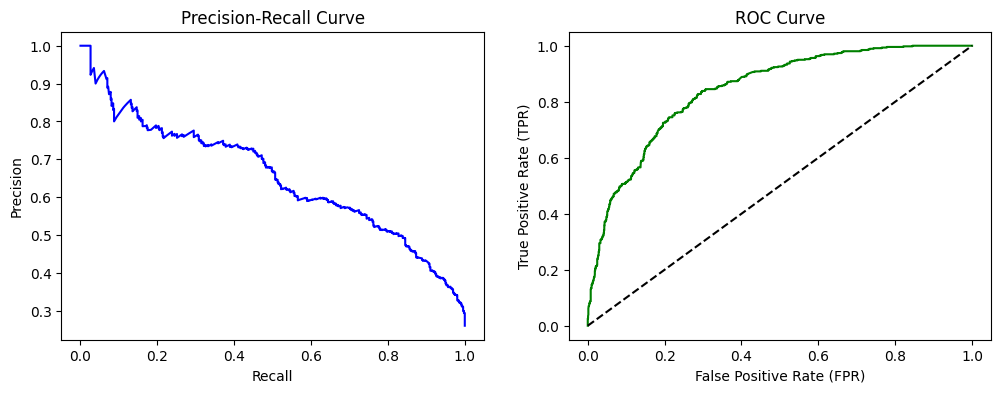

In [45]:
# Capturar el tiempo de inicio
start_time = time.time()

model = LogisticRegression(random_state=12345)
gscv = GridSearchCV(
    model,
    param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 200, 300],
    "class_weight": [None, "balanced"]
    },  
    scoring="recall",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_train,target_train)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid,model.predict(features_valid))
plot_curves(target_valid,probas[:,1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'metric': 'euclidean', 'n_neighbors': 29, 'weights': 'uniform'}
Accuracy: 0.799
Precision: 0.621
Recall: 0.581
F1 Score: 0.600
ROC AUC: 0.728
El modelo tardó 17.0183 segundos en entrenar.


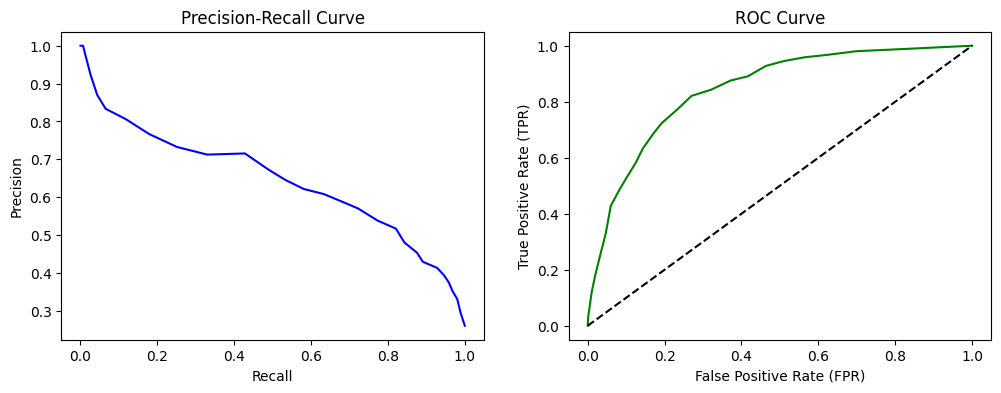

In [46]:
# Capturar el tiempo de inicio
start_time = time.time()

model = KNeighborsClassifier()
gscv = GridSearchCV(
    model,
    param_grid={
     'n_neighbors': np.arange(1, 31),
      'weights': ['uniform', 'distance'],
     'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    scoring="f1",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_train,target_train)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid,model.predict(features_valid))
plot_curves(target_valid,probas[:,1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1.0}
Accuracy: 0.664
Precision: 0.427
Recall: 0.862
F1 Score: 0.572
ROC AUC: 0.728
El modelo tardó 32.8879 segundos en entrenar.


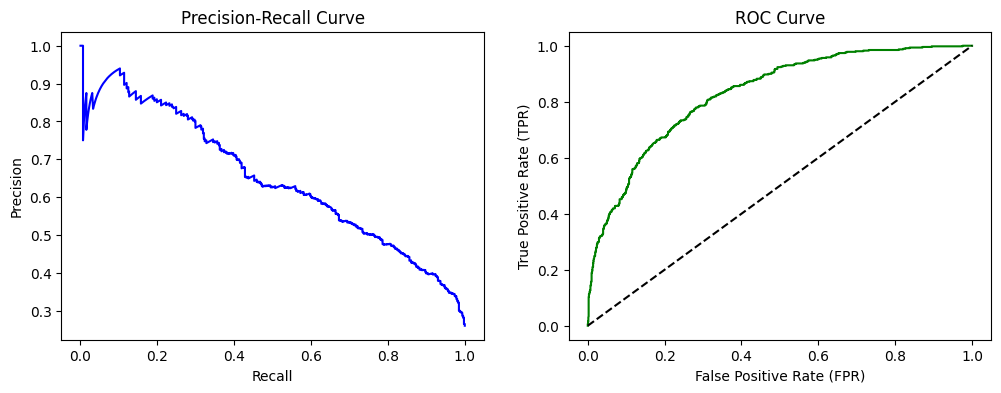

In [47]:
# Capturar el tiempo de inicio
start_time = time.time()

model = XGBClassifier()
rscv = RandomizedSearchCV(
    model,
    param_distributions =  {
    "max_depth": np.arange(2, 6),
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "n_estimators": [10,25,50],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.5, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2],
    "scale_pos_weight": [1, 10, 25, 50]
},
    scoring="f1",
    n_iter=200,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_train, target_train)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1411, number of negative: 3871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267134 -> initscore=-1.009214
[LightGBM] [Info] Start training from score -1.009214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

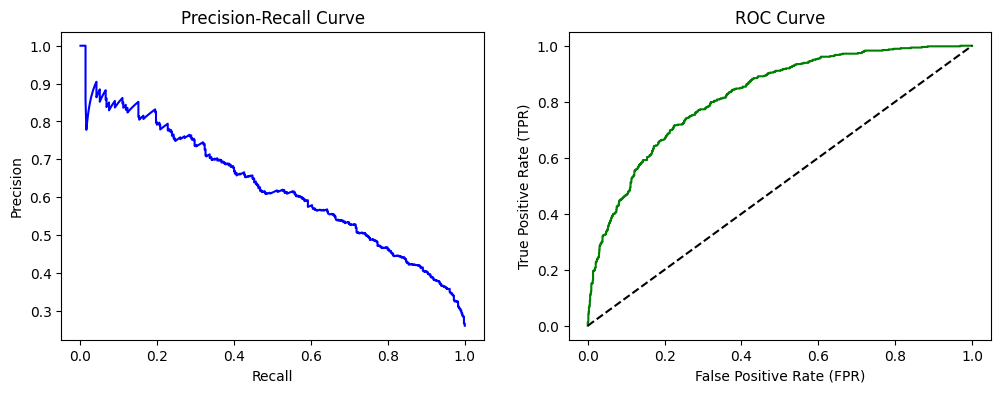

In [48]:
# Capturar el tiempo de inicio
start_time = time.time()

model = LGBMClassifier()

rscv = RandomizedSearchCV(
    model,
 param_distributions =  {
    'max_depth': [3, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'min_child_samples': [10, 50],
},
    scoring="recall",
    n_iter=125,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_train, target_train)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

0:	learn: 0.5869094	total: 140ms	remaining: 6.87s
1:	learn: 0.5302369	total: 142ms	remaining: 3.4s
2:	learn: 0.4956657	total: 143ms	remaining: 2.25s
3:	learn: 0.4778081	total: 145ms	remaining: 1.66s
4:	learn: 0.4656495	total: 146ms	remaining: 1.32s
5:	learn: 0.4534999	total: 148ms	remaining: 1.08s
6:	learn: 0.4468079	total: 149ms	remaining: 917ms
7:	learn: 0.4409425	total: 151ms	remaining: 791ms
8:	learn: 0.4381232	total: 152ms	remaining: 693ms
9:	learn: 0.4345479	total: 153ms	remaining: 613ms
10:	learn: 0.4302356	total: 155ms	remaining: 549ms
11:	learn: 0.4282391	total: 156ms	remaining: 495ms
12:	learn: 0.4265653	total: 158ms	remaining: 449ms
13:	learn: 0.4245174	total: 159ms	remaining: 409ms
14:	learn: 0.4231676	total: 160ms	remaining: 374ms
15:	learn: 0.4210406	total: 162ms	remaining: 344ms
16:	learn: 0.4200086	total: 163ms	remaining: 317ms
17:	learn: 0.4192276	total: 165ms	remaining: 293ms
18:	learn: 0.4181587	total: 166ms	remaining: 271ms
19:	learn: 0.4170778	total: 168ms	remainin

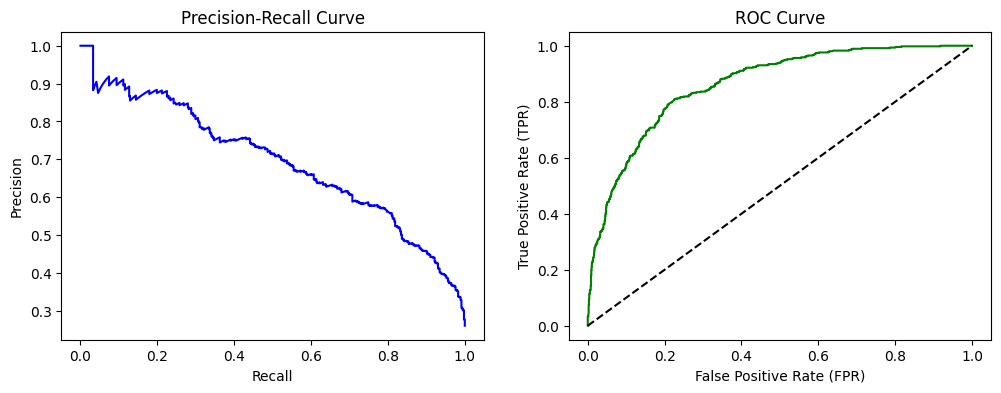

In [49]:
# Capturar el tiempo de inicio
start_time = time.time()

model = CatBoostClassifier()

rscv = RandomizedSearchCV(
    model,
   param_distributions = {
    'iterations': [50, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'depth': [3, 10], 
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 255],
},
    scoring="recall",
    n_iter=100,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_train, target_train)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

### Entrenamiento de modelos con datos con sobremuestro

Mejores hiperparámetros:
{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_split': 2}
Accuracy: 0.730
Precision: 0.487
Recall: 0.701
F1 Score: 0.575
ROC AUC: 0.721
El modelo tardó 82.4961 segundos en entrenar.


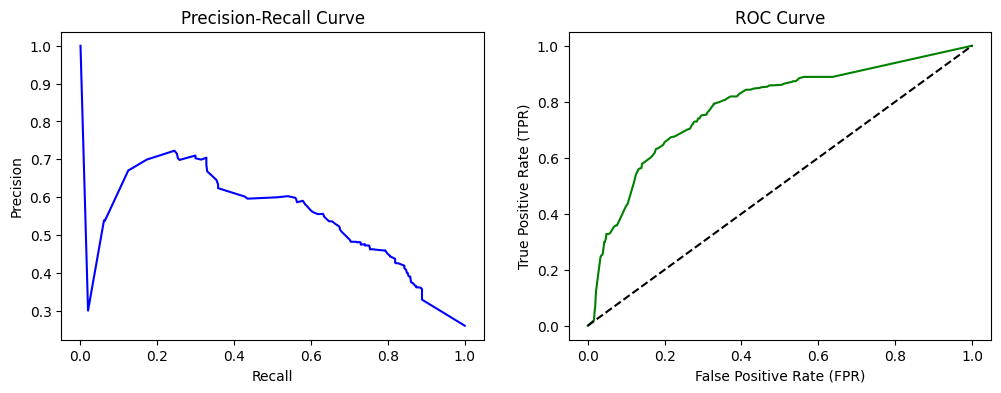

In [50]:
# Capturar el tiempo de inicio
start_time = time.time()

model = DecisionTreeClassifier(random_state=12345)
gscv = GridSearchCV(
    model,
    param_grid={
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": np.arange(2, 12),
        "min_samples_split": np.arange(2, 100, 10),
        "max_features": ["sqrt", "log2", None],
        "class_weight": [None, "balanced"]
    },
    scoring="f1",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_resampled, target_resampled)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'n_estimators': 20, 'min_samples_split': 22, 'max_features': None, 'max_depth': 5, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
Accuracy: 0.767
Precision: 0.537
Recall: 0.762
F1 Score: 0.630
ROC AUC: 0.766
El modelo tardó 93.8821 segundos en entrenar.


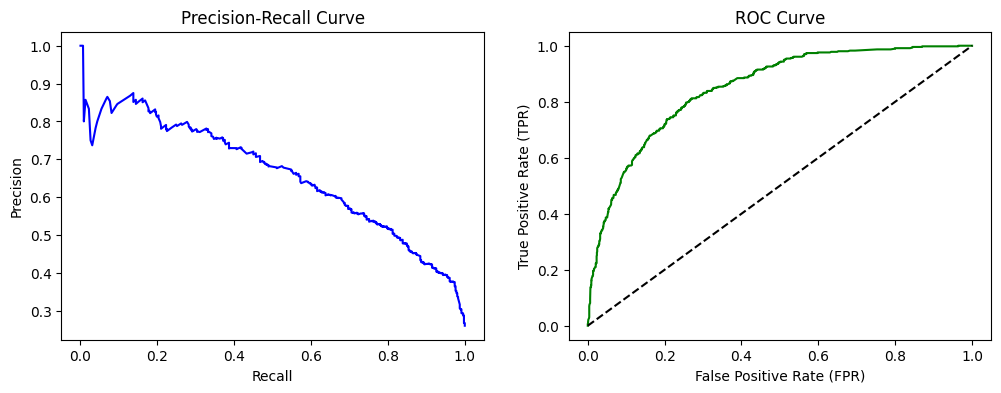

In [51]:
# Capturar el tiempo de inicio
start_time = time.time()

model = RandomForestClassifier(random_state=12345)

rscv = RandomizedSearchCV(
    model,
    param_distributions = {
    "bootstrap":[True, False],
    "n_estimators": [20, 50, 100],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.arange(2, 6),
    "min_samples_split": np.arange(2, 100, 10),
    "max_features": ["sqrt", "log2", None],
    "class_weight": [None, "balanced"]
},
    scoring="f1",
    n_iter=125,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_resampled, target_resampled)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.795
Precision: 0.586
Recall: 0.725
F1 Score: 0.648
ROC AUC: 0.772
El modelo tardó 305.3392 segundos en entrenar.


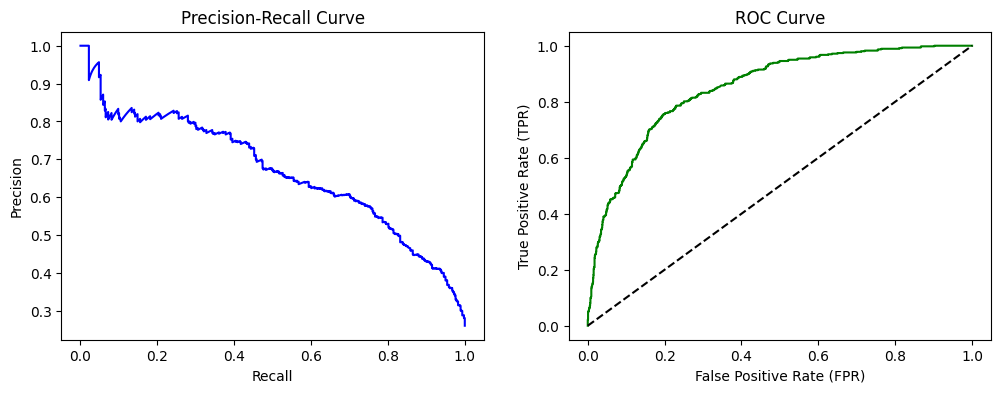

In [66]:
# Capturar el tiempo de inicio
start_time = time.time()

model = LogisticRegression(random_state=12345)
gscv = GridSearchCV(
    model,
    param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 200, 300],
    "class_weight": [None, "balanced"]
    },  
    scoring="recall",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_resampled,target_resampled)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
#Guardar modelo
joblib.dump(model,'modelo_LogisticRegression_UpResampled.pkl')
probas = model.predict_proba(features_valid)
print_metrics(target_valid,model.predict(features_valid))
plot_curves(target_valid,probas[:,1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.730
Precision: 0.484
Recall: 0.614
F1 Score: 0.541
ROC AUC: 0.692
El modelo tardó 31.5912 segundos en entrenar.


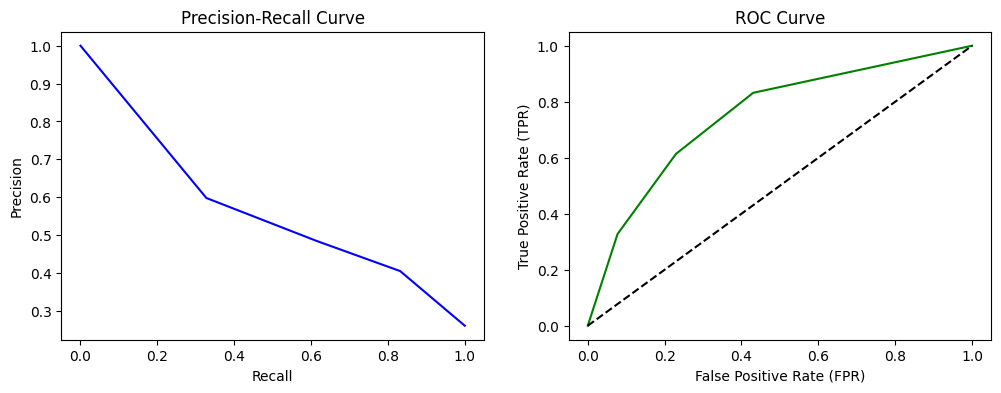

In [53]:
# Capturar el tiempo de inicio
start_time = time.time()

model = KNeighborsClassifier()
gscv = GridSearchCV(
    model,
    param_grid={
     'n_neighbors': np.arange(1, 31),
      'weights': ['uniform', 'distance'],
     'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    scoring="f1",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_resampled,target_resampled)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid,model.predict(features_valid))
plot_curves(target_valid,probas[:,1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'subsample': 0.5, 'scale_pos_weight': 1, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Accuracy: 0.780
Precision: 0.558
Recall: 0.734
F1 Score: 0.634
ROC AUC: 0.765
El modelo tardó 38.5583 segundos en entrenar.


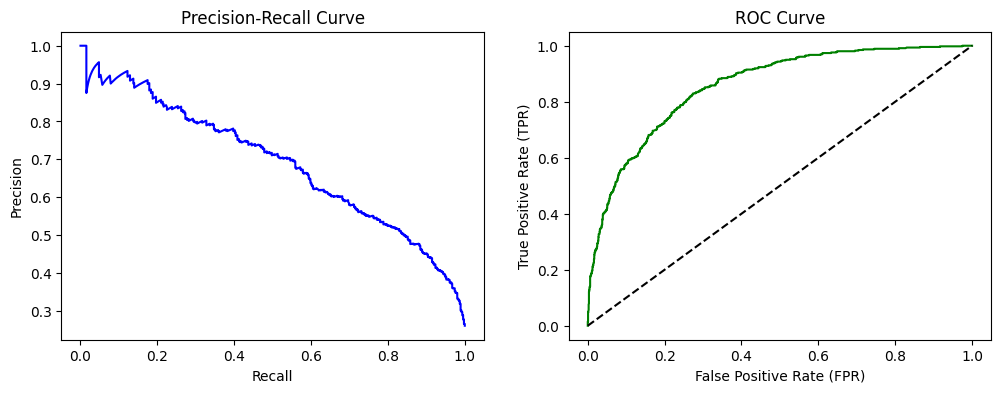

In [54]:
# Capturar el tiempo de inicio
start_time = time.time()

model = XGBClassifier()
rscv = RandomizedSearchCV(
    model,
 param_distributions =  {
    "max_depth": np.arange(2, 6),
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "n_estimators": [10,25,50],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.5, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2],
    "scale_pos_weight": [1, 10, 25, 50, 100]
},
    scoring="f1",
    n_iter=200,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_resampled, target_resampled)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3871, number of negative: 3871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 7742, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Mejores hiperparámetros:
{'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.0, 'n_estimators': 50, 'min_child_samples': 50, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
Accuracy: 0.786
Precision: 0.581
Recall: 0.631
F1 Score: 0.605
ROC AUC: 0.736
El modelo tardó 47.7503 segundos en entrenar.


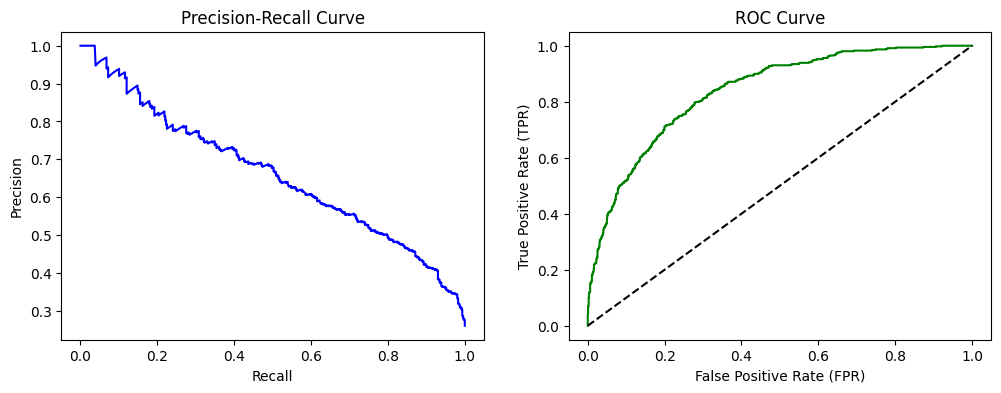

In [55]:
# Capturar el tiempo de inicio
start_time = time.time()

model = LGBMClassifier()

rscv = RandomizedSearchCV(
    model,
    param_distributions= {
    'n_estimators': [10,25,50],
    'max_depth': [3, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'min_child_samples': [10, 50],
},
    scoring="roc_auc",
    n_iter=125,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_resampled, target_resampled)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

0:	learn: 0.6863926	total: 28.8ms	remaining: 5.72s
1:	learn: 0.6798459	total: 43.9ms	remaining: 4.34s
2:	learn: 0.6734296	total: 58.8ms	remaining: 3.86s
3:	learn: 0.6673109	total: 73.2ms	remaining: 3.58s
4:	learn: 0.6613948	total: 86.7ms	remaining: 3.38s
5:	learn: 0.6565241	total: 91.3ms	remaining: 2.95s
6:	learn: 0.6513020	total: 106ms	remaining: 2.91s
7:	learn: 0.6461895	total: 121ms	remaining: 2.91s
8:	learn: 0.6410503	total: 136ms	remaining: 2.89s
9:	learn: 0.6354974	total: 150ms	remaining: 2.85s
10:	learn: 0.6313107	total: 155ms	remaining: 2.66s
11:	learn: 0.6268877	total: 159ms	remaining: 2.5s
12:	learn: 0.6222336	total: 174ms	remaining: 2.5s
13:	learn: 0.6171579	total: 188ms	remaining: 2.5s
14:	learn: 0.6118930	total: 203ms	remaining: 2.5s
15:	learn: 0.6088302	total: 205ms	remaining: 2.35s
16:	learn: 0.6038687	total: 219ms	remaining: 2.36s
17:	learn: 0.5994688	total: 234ms	remaining: 2.37s
18:	learn: 0.5953595	total: 249ms	remaining: 2.37s
19:	learn: 0.5910624	total: 264ms	remai

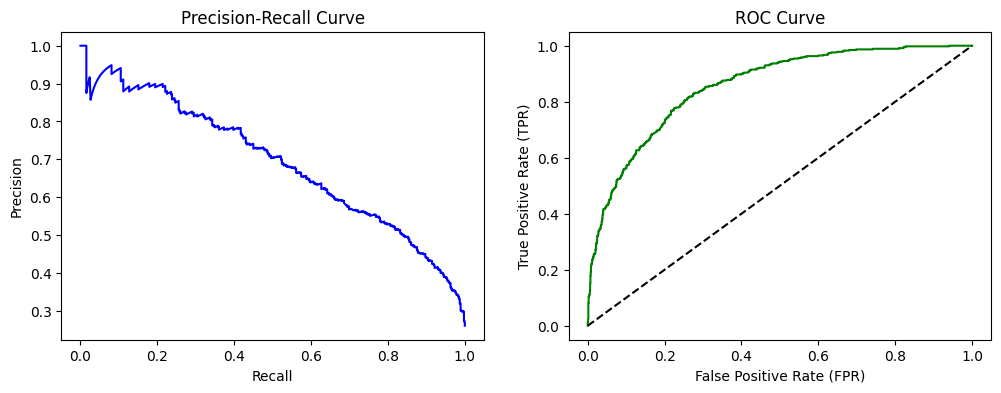

In [56]:
# Capturar el tiempo de inicio
start_time = time.time()

model = CatBoostClassifier()

rscv = RandomizedSearchCV(
    model,
    param_distributions =  {
    'iterations': [50, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'depth': [3, 10], 
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 255],
},
    scoring="recall",
    n_iter=100,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_resampled, target_resampled)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

### Entrenamiento de modelos con datos submuestro 

Mejores hiperparámetros:
{'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 82}
Accuracy: 0.726
Precision: 0.483
Recall: 0.771
F1 Score: 0.594
ROC AUC: 0.740
El modelo tardó 46.9324 segundos en entrenar.


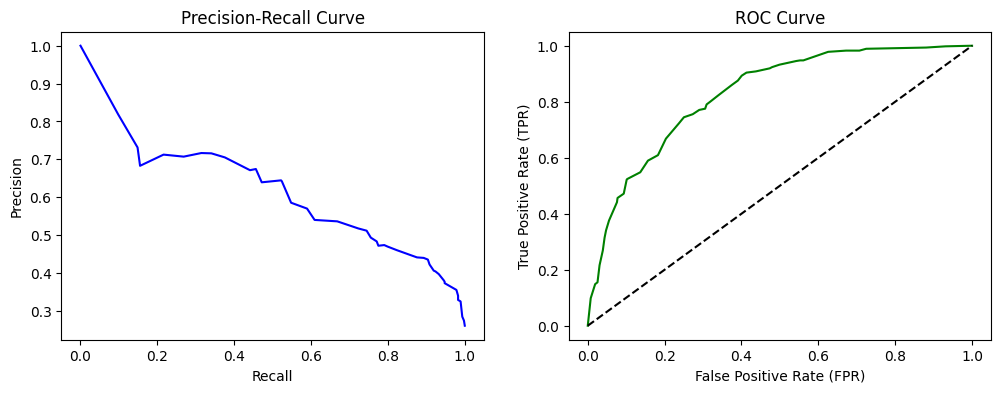

In [57]:
# Capturar el tiempo de inicio
start_time = time.time()

model = DecisionTreeClassifier(random_state=12345)
gscv = GridSearchCV(
    model,
    param_grid={
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": np.arange(2, 12),
        "min_samples_split": np.arange(2, 100, 10),
        "max_features": ["sqrt", "log2", None],
        "class_weight": [None, "balanced"]
    },
    scoring="f1",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_under_resampled, target_under_resampled)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'n_estimators': 20, 'min_samples_split': 52, 'max_features': None, 'max_depth': 5, 'criterion': 'log_loss', 'class_weight': 'balanced', 'bootstrap': True}
Accuracy: 0.749
Precision: 0.511
Recall: 0.832
F1 Score: 0.633
ROC AUC: 0.776
El modelo tardó 43.8562 segundos en entrenar.


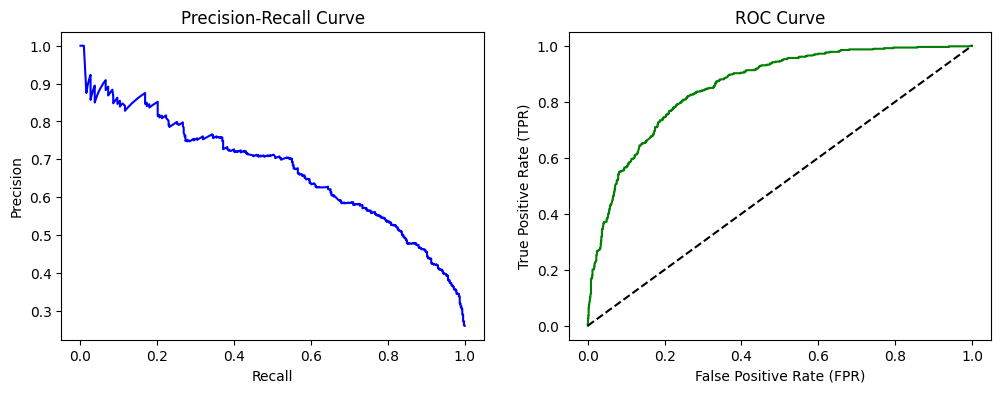

In [65]:
# Capturar el tiempo de inicio
start_time = time.time()

model = RandomForestClassifier(random_state=12345)

rscv = RandomizedSearchCV(
    model,
    param_distributions= {
    "bootstrap":[True, False],
    "n_estimators": [20, 50, 100],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": np.arange(2, 6),
    "min_samples_split": np.arange(2, 100, 10),
    "max_features": ["sqrt", "log2", None],
    "class_weight": [None, "balanced"]
},
    scoring="f1",
    n_iter=125,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_under_resampled, target_under_resampled)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
#Guardar modelo
joblib.dump(model,'modelo_RandomForestClassifier_UnderResampled.pkl')
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.728
Precision: 0.487
Recall: 0.841
F1 Score: 0.616
ROC AUC: 0.765
El modelo tardó 39.7889 segundos en entrenar.


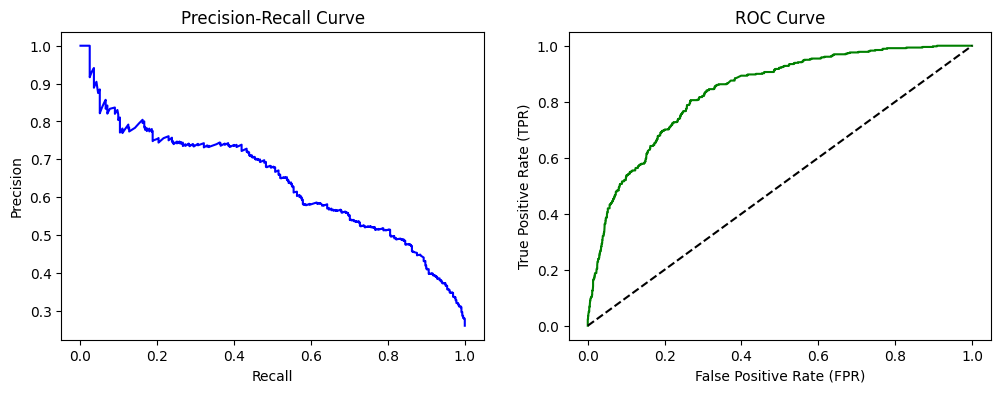

In [59]:
# Capturar el tiempo de inicio
start_time = time.time()

model = LogisticRegression(random_state=12345)
gscv = GridSearchCV(
    model,
    param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 200, 300],
    "class_weight": [None, "balanced"]
    },  
    scoring="recall",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_under_resampled,target_under_resampled)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid,model.predict(features_valid))
plot_curves(target_valid,probas[:,1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'uniform'}
Accuracy: 0.702
Precision: 0.460
Recall: 0.843
F1 Score: 0.595
ROC AUC: 0.748
El modelo tardó 8.3616 segundos en entrenar.


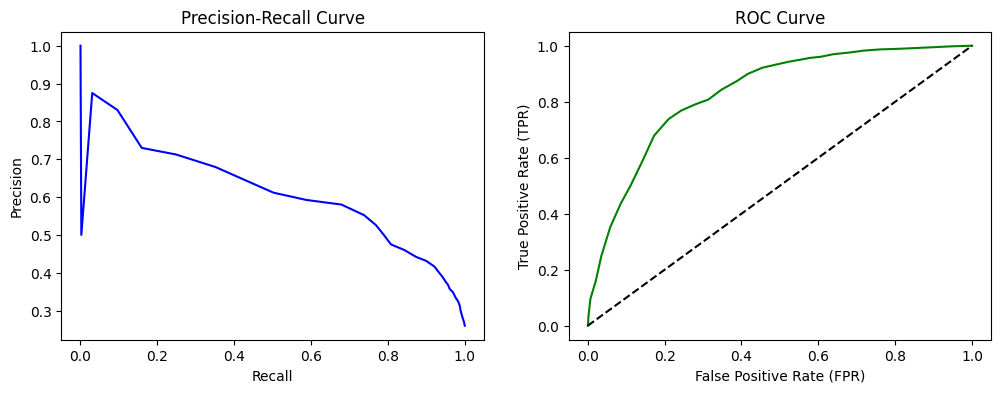

In [60]:
# Capturar el tiempo de inicio
start_time = time.time()

model = KNeighborsClassifier()
gscv = GridSearchCV(
    model,
    param_grid={
     'n_neighbors': np.arange(1, 31),
      'weights': ['uniform', 'distance'],
     'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    scoring="f1",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(features_under_resampled,target_under_resampled)
print("Mejores hiperparámetros:")
print(gscv.best_params_)
model = gscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid,model.predict(features_valid))
plot_curves(target_valid,probas[:,1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

Mejores hiperparámetros:
{'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
Accuracy: 0.739
Precision: 0.499
Recall: 0.838
F1 Score: 0.625
ROC AUC: 0.771
El modelo tardó 25.9986 segundos en entrenar.


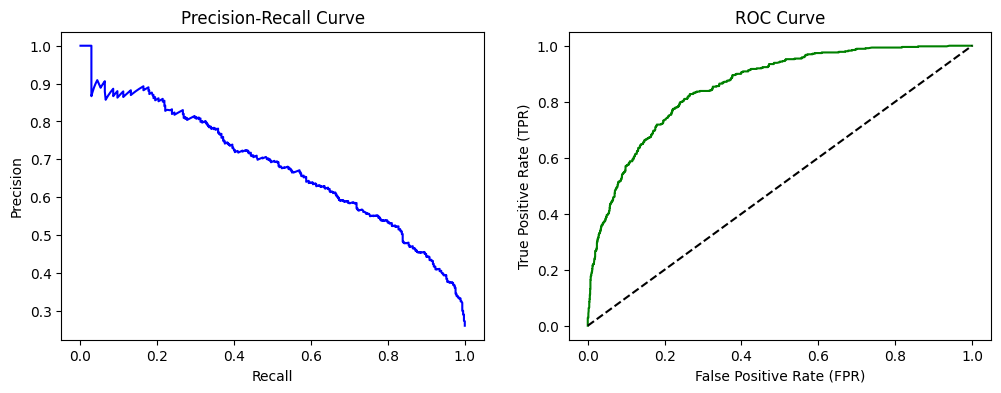

In [61]:
# Capturar el tiempo de inicio
start_time = time.time()

model = XGBClassifier()
rscv = RandomizedSearchCV(
    model,
    param_distributions = {
    "max_depth": np.arange(2, 6),
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "n_estimators": [10,25,50],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.5, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2],
    "scale_pos_weight": [1, 10, 25, 50, 100]
},
    scoring="f1",
    n_iter=200,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_under_resampled, target_under_resampled)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1411, number of negative: 1411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 2822, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

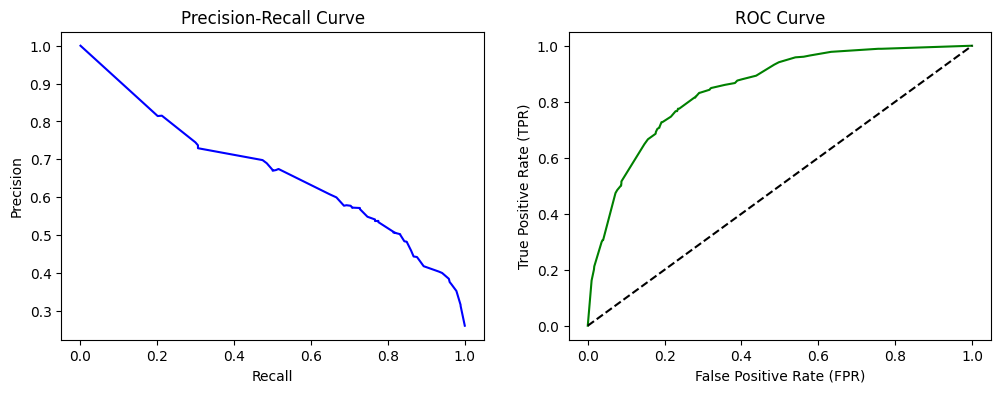

In [62]:
# Capturar el tiempo de inicio
start_time = time.time()

model = LGBMClassifier()

rscv = RandomizedSearchCV(
    model,
    param_distributions= {
    'n_estimators': [10,25,50],
    'max_depth': [3, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'min_child_samples': [10, 50],
},
    scoring="recall",
    n_iter=125,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_under_resampled, target_under_resampled)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

0:	learn: 0.6895410	total: 1.7ms	remaining: 83.1ms
1:	learn: 0.6862760	total: 3.26ms	remaining: 78.3ms
2:	learn: 0.6827559	total: 4.29ms	remaining: 67.2ms
3:	learn: 0.6794777	total: 5.34ms	remaining: 61.4ms
4:	learn: 0.6763314	total: 6.35ms	remaining: 57.2ms
5:	learn: 0.6731461	total: 7.35ms	remaining: 53.9ms
6:	learn: 0.6699810	total: 8.43ms	remaining: 51.8ms
7:	learn: 0.6670674	total: 9.47ms	remaining: 49.7ms
8:	learn: 0.6639342	total: 10.5ms	remaining: 48ms
9:	learn: 0.6608226	total: 11.6ms	remaining: 46.4ms
10:	learn: 0.6578270	total: 12.6ms	remaining: 44.8ms
11:	learn: 0.6548511	total: 13.7ms	remaining: 43.4ms
12:	learn: 0.6519292	total: 14.7ms	remaining: 41.9ms
13:	learn: 0.6495213	total: 15.8ms	remaining: 40.5ms
14:	learn: 0.6469461	total: 16.9ms	remaining: 39.5ms
15:	learn: 0.6443912	total: 18.1ms	remaining: 38.5ms
16:	learn: 0.6420287	total: 19.3ms	remaining: 37.4ms
17:	learn: 0.6395137	total: 20.3ms	remaining: 36.2ms
18:	learn: 0.6370051	total: 21.4ms	remaining: 34.9ms
19:	le

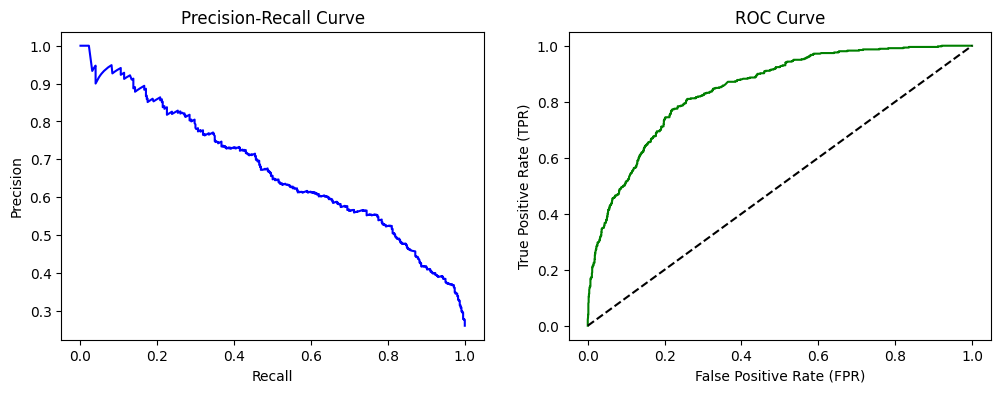

In [63]:
# Capturar el tiempo de inicio
start_time = time.time()

model = CatBoostClassifier()

rscv = RandomizedSearchCV(
    model,
    param_distributions =  {
    'iterations': [50, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'depth': [3, 10], 
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 255],
},
    scoring="recall",
    n_iter=100,
    cv=kfold,
    n_jobs=-1
)
rscv.fit(features_under_resampled, target_under_resampled)
print("Mejores hiperparámetros:")
print(rscv.best_params_)
model = rscv.best_estimator_
probas = model.predict_proba(features_valid)
print_metrics(target_valid, model.predict(features_valid))
plot_curves(target_valid, probas[:, 1])

# Capturar el tiempo de fin
end_time = time.time()

# Calcular el tiempo total
training_time = end_time - start_time
print(f"El modelo tardó {training_time:.4f} segundos en entrenar.")

### Hallazgo

Realizamos el entrenamiento de 7 modelos de aprendizaje automático, en los cuales los modelos fueron entrenados con 3 tipos de datos tratados: datos sin equilibrio de clase, datos con sobremuestreo y datos con submuestreo. Esto con el propósito de encontrar las mejores métricas para que los modelos den un buen resultado de `ROC_AUC`.

- El modelo que dio buenos resultados con los datos sin equilibrio de clase fue `RandomForestClassifier` con un `ROC_AUC` de `0.776`.
- El modelo que dio buenos resultados con los datos con sobremuestreo fue `LogisticRegression` con un `ROC_AUC` de `0.772`.
- El modelo que dio buenos resultados con los datos con submuestreo fue `RandomForestClassifier` con un `ROC_AUC` de `0.774`.

Para este caso, en el cual buscamos que un modelo tenga un `ROC_AUC` > `0.750`, estos modelos anteriormente comentados pueden ser las mejores opciones que tenemos. Sin embargo, considero que el modelo que puede ser más útil con los datos que se encuentran en submuestreo es más adecuado, dado que el submuestreo se realiza para reducir el número de ejemplos en la clase mayoritaria para igualarlo con la clase minoritaria. Esto puede ayudar a los modelos a aprender mejor las características de ambas clases sin sesgarse hacia la clase mayoritaria.

Por lo tanto, para el modelo de aprendizaje automático, considero que usar un `RandomForestClassifier` puede ser ideal para detectar los clientes que pueden abandonar el servicio.





# Conclusion 

Con los datos adquiridos, podemos decir que los clientes que abandonan los servicios tienen una tasa del 26.5% de los datos entregados, de los cuales la mayoría deja el servicio en el primer mes. Una buena estrategia sería darle más seguimiento a estos clientes durante el primer mes de uso del servicio para mantenerlos.

Además, notamos que estos clientes tienden a tener un alto cargo en sus pagos mensuales, en comparación con los clientes que se mantienen.

Los clientes que hacen su pago de forma electrónica, tienen un contrato mensual y contratan fibra óptica tienen mayor probabilidad de dejar el servicio.

Al realizar el entrenamiento de los modelos con los diferentes datos tratados, los mejores modelos para esta tarea que dieron buen resultado fueron `RandomForestClassifier` y `LogisticRegression`.

Cada uno de estos modelos tiene un `ROC_AUC` mayor de `0.75`, que era el valor buscado para considerar estos modelos de aprendizaje automático para ayudar en la detección de clientes que puedan dejar el servicio.

# Informe

Para el desarrollo del proyecto se realizó un modelo de aprendizaje automático, en el cual tenemos la información de los clientes para poder hacer una detección de los patrones de los clientes que se encuentran dentro del servicio actualmente y los que han decidido abandonar el servicio.

Realizamos los pasos que estaban planteados en el plan de trabajo sin inconvenientes, para poder entrenar un modelo que tenga un `ROC_AUC` mayor a `0.75`.

## Desarrollo del proyecto

Para esto, fue importante hacer un merge de los datos para crear un DataFrame con la recopilación de todos los datos. Este DataFrame se nombró `Historico` ya que contiene todos los datos de los clientes, así como todo su historial de los servicios que han solicitado. Además, se creó una columna `ChurnRate` para verificar los clientes activos y los que han abandonado el servicio.

Esto sirvió para entrenar el modelo dado que así se cuenta con una mayor cantidad de datos. Después de esto, se trataron los valores nulos para luego poder hacer una codificación OHE para los valores categóricos, evitando problemas al entrenar el modelo.

Una vez terminada esta parte, nos dedicamos al modelado de datos en el cual realizamos una gran búsqueda para encontrar los mejores modelos con los hiperparámetros ideales para que den el mejor resultado de `ROC_AUC`. Generamos funciones para que, cuando entreguemos los modelos entrenados y las predicciones, se generen las métricas de evaluación de nuestro modelo y se presenten en mensajes y gráficos.

## Dificultades

Una de las dificultades fue el tratamiento de los valores nulos que existían, dado que cuando realizamos los merges de datos, algunas columnas tenían una gran cantidad de valores nulos, sobre todo en el dataset de `internet.csv`, que cuenta con `5517` filas. Esto quiere decir que esta cantidad de clientes son los que han solicitado el servicio de internet, dejando `1526` clientes que no solicitaron esta clase de servicio, por lo cual considero que es la razón por la cual no existen datos de ellos.

Por ello, decidí que en vez de rellenar los datos nulos con `no`, ponerlos como `noService`, dado que así puedo categorizar estos valores para distinguir este tipo de clientes. Esto es igual para los valores de la columna `MultipleLines`, dado que existe un grupo de clientes que no ha solicitado ese servicio de `phone`.

Para los valores del dataset de `contract.csv` en la columna `TotalCharges`, que tenía pocos valores nulos, decidí usar los valores de `MonthlyCharges` y usarlos también para `TotalCharges`, dado que en algunas filas los valores de `MonthlyCharges` y `TotalCharges` eran los mismos.

## Conclusión

De los 7 modelos de aprendizaje automático que fueron entrenados, los siguientes fueron los mejores dependiendo del tratamiento de los datos:

- El modelo que dio buenos resultados con los datos sin equilibrio de clase fue `RandomForestClassifier` con un `ROC_AUC` de `0.776`.
- El modelo que dio buenos resultados con los datos con sobremuestreo fue `LogisticRegression` con un `ROC_AUC` de `0.772`.
- El modelo que dio buenos resultados con los datos con submuestreo fue `RandomForestClassifier` con un `ROC_AUC` de `0.774`.

Para este caso, podemos decir que el mejor modelo para usar en la predicción de clientes que abandonen el servicio sería `RandomForestClassifier` con los hiperparámetros `'n_estimators': 100, 'min_samples_split': 82, 'max_features': None, 'max_depth': 5, 'criterion': 'log_loss', 'class_weight': 'balanced', 'bootstrap': True`. Con estos parámetros se obtuvo un ROC_AUC de `0.776`.

Este ha sido el mejor modelo entrenado para predecir cuáles serían los clientes que abandonarían el servicio.


